,c1,c2
0,42.0,120721.000000
1,58.0,154962.000000
2,60.0,184960.000000
3,68.0,148004.320000
4,69.0,141133.000000
5,76.0,176082.000000
6,91.0,208169.000000
7,96.0,409308.000000
8,100.0,247658.000000
9,102.0,127235.000000


x=[100], Predicted=[221755.47957076]
x=[101], Predicted=[222607.63710003]


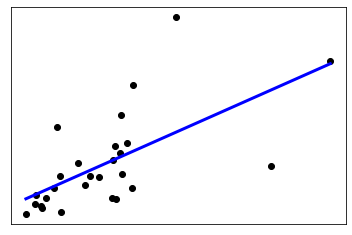

In [100]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import ipywidgets as wg
from IPython.display import display, clear_output, Image
from ipywidgets import *

df_ml = df[['Beds', 'TotalBldg_GSF']].groupby(['Beds'], as_index=False).mean()
df_ml = df_ml.dropna()
df_ml.columns = ['c1', 'c2']
df_ml.to_csv('test.csv', index=False)
display(df_ml)

data = pd.read_csv('test.csv', index_col=False, header=0)
x = data.c1.values
y = data.c2.values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show
xnew = [[100], [101]]
ynew = regr.predict(xnew)
for i in range(len(xnew)):
    print("x=%s, Predicted=%s" % (xnew[i], ynew[i]))

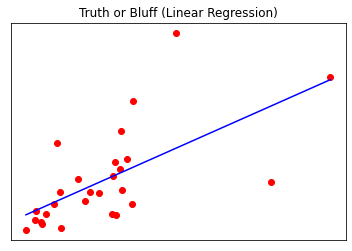

[[988697.25591022]]
[[922255.22967792]]


In [89]:
data = pd.read_csv('test.csv', index_col=False, header=0)
X = data.c1.values
y = data.c2.values
X = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
#     plt.xlabel('Position level')
#     plt.ylabel('Salary')
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return
viz_linear()

# Visualizing the Polymonial Regression results
# def viz_polymonial():
#     plt.scatter(X, y, color='red')
#     plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
#     plt.title('Truth or Bluff (Polynomial Regression)')
# #     plt.xlabel('Position level')
# #     plt.ylabel('Salary')
#     plt.xticks(())
#     plt.yticks(())
#     plt.show()
#     return
# viz_polymonial()

# Predicting a new result with Linear Regression
print(lin_reg.predict([[1000]]))
# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[1000]])))

In [102]:
plot_output = wg.Output()

with plot_output:
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Polynomial Regression)')
#     plt.xlabel('Position level')
#     plt.ylabel('Salary')
    plt.xticks(())
    plt.yticks(())
    plt.show()

accordion = wg.Accordion(children=[plot_output, plot_output])
accordion.set_title(0, 'Linear Regression')
accordion.set_title(1, 'Project Recommendation')
accordion

Accordion(children=(Output(), Output()), _titles={'0': 'KDE Plot', '1': 'Project Recommendation'})